# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (12,7)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df.head()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  75166          406.691          243.032         0.802       78789   0.684   
2  90856          442.267          266.328         0.798       93717   0.638   
3  45928          286.541          208.760         0.685       47336   0.700   
4  79408          352.191          290.828         0.564       81463   0.793   

   Perimeter    Class  
0   1184.040  Kecimen  
1   1121.786  Kecimen  
2   1208.575  Kecimen  
3    844.162  Kecimen  
4   1073.251  Kecimen

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
df.describe().T

count      mean       std       min       25%       50%  \
Area            900.000 87804.128 39002.111 25387.000 59348.000 78902.000   
MajorAxisLength 900.000   430.930   116.035   225.630   345.443   407.804   
MinorAxisLength 900.000   254.488    49.989   143.711   219.111   247.848   
Eccentricity    900.000     0.782     0.090     0.349     0.742     0.799   
ConvexArea      900.000 91186.090 40769.290 26139.000 61513.250 81651.000   
Extent          900.000     0.700     0.053     0.380     0.671     0.707   
Perimeter       900.000  1165.907   273.764   619.074   966.411  1119.509   

                       75%        max  
Area            105028.250 235047.000  
MajorAxisLength    494.187    997.292  
MinorAxisLength    279.889    492.275  
Eccentricity         0.843      0.962  
ConvexArea      108375.750 278217.000  
Extent               0.735      0.835  
Perimeter         1308.390   2697.753

In [5]:
df.Class.value_counts() ## Balanced

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [6]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

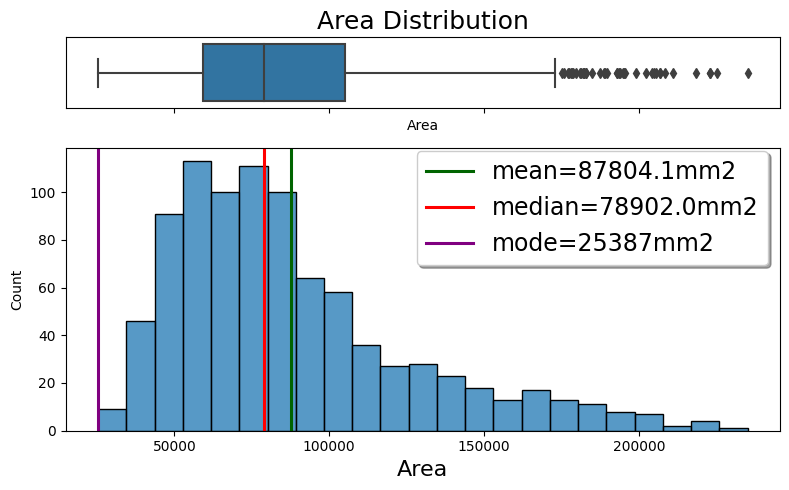

In [7]:
num_plot(df, 'Area', 'Area Distribution','mm2')

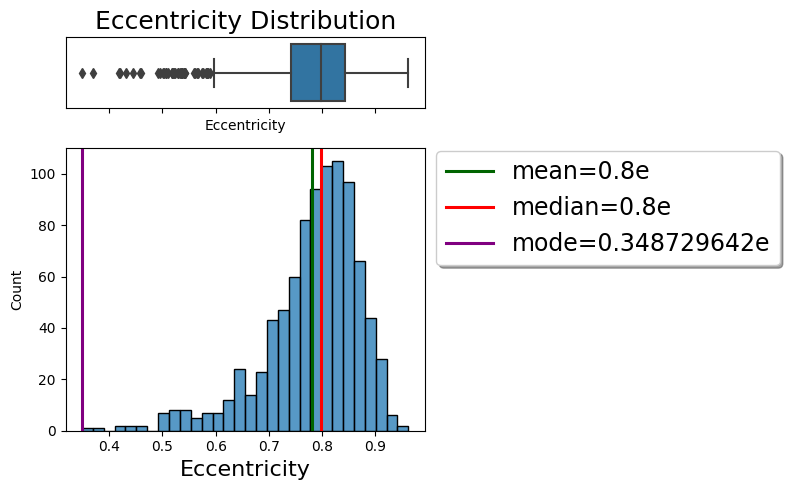

In [8]:
num_plot(df, 'Eccentricity', 'Eccentricity Distribution','e')

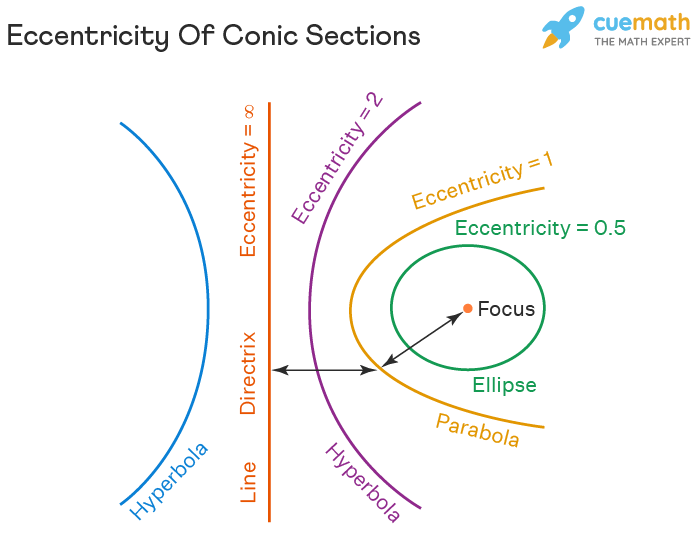

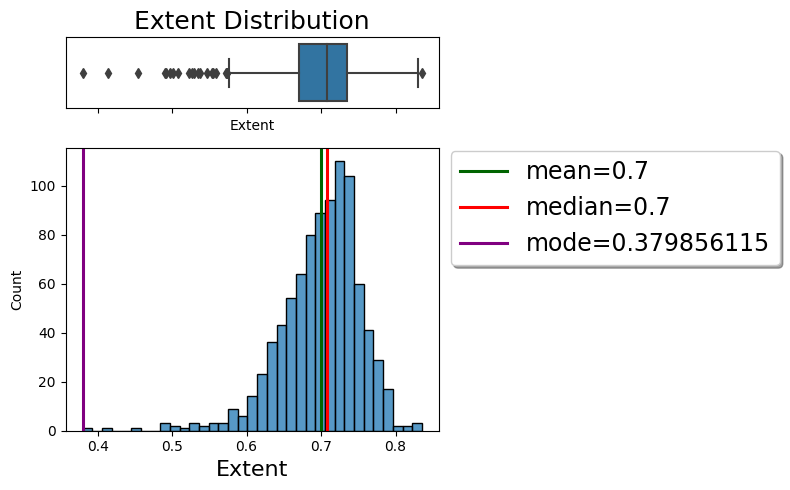

In [9]:
num_plot(df, 'Extent', 'Extent Distribution','')

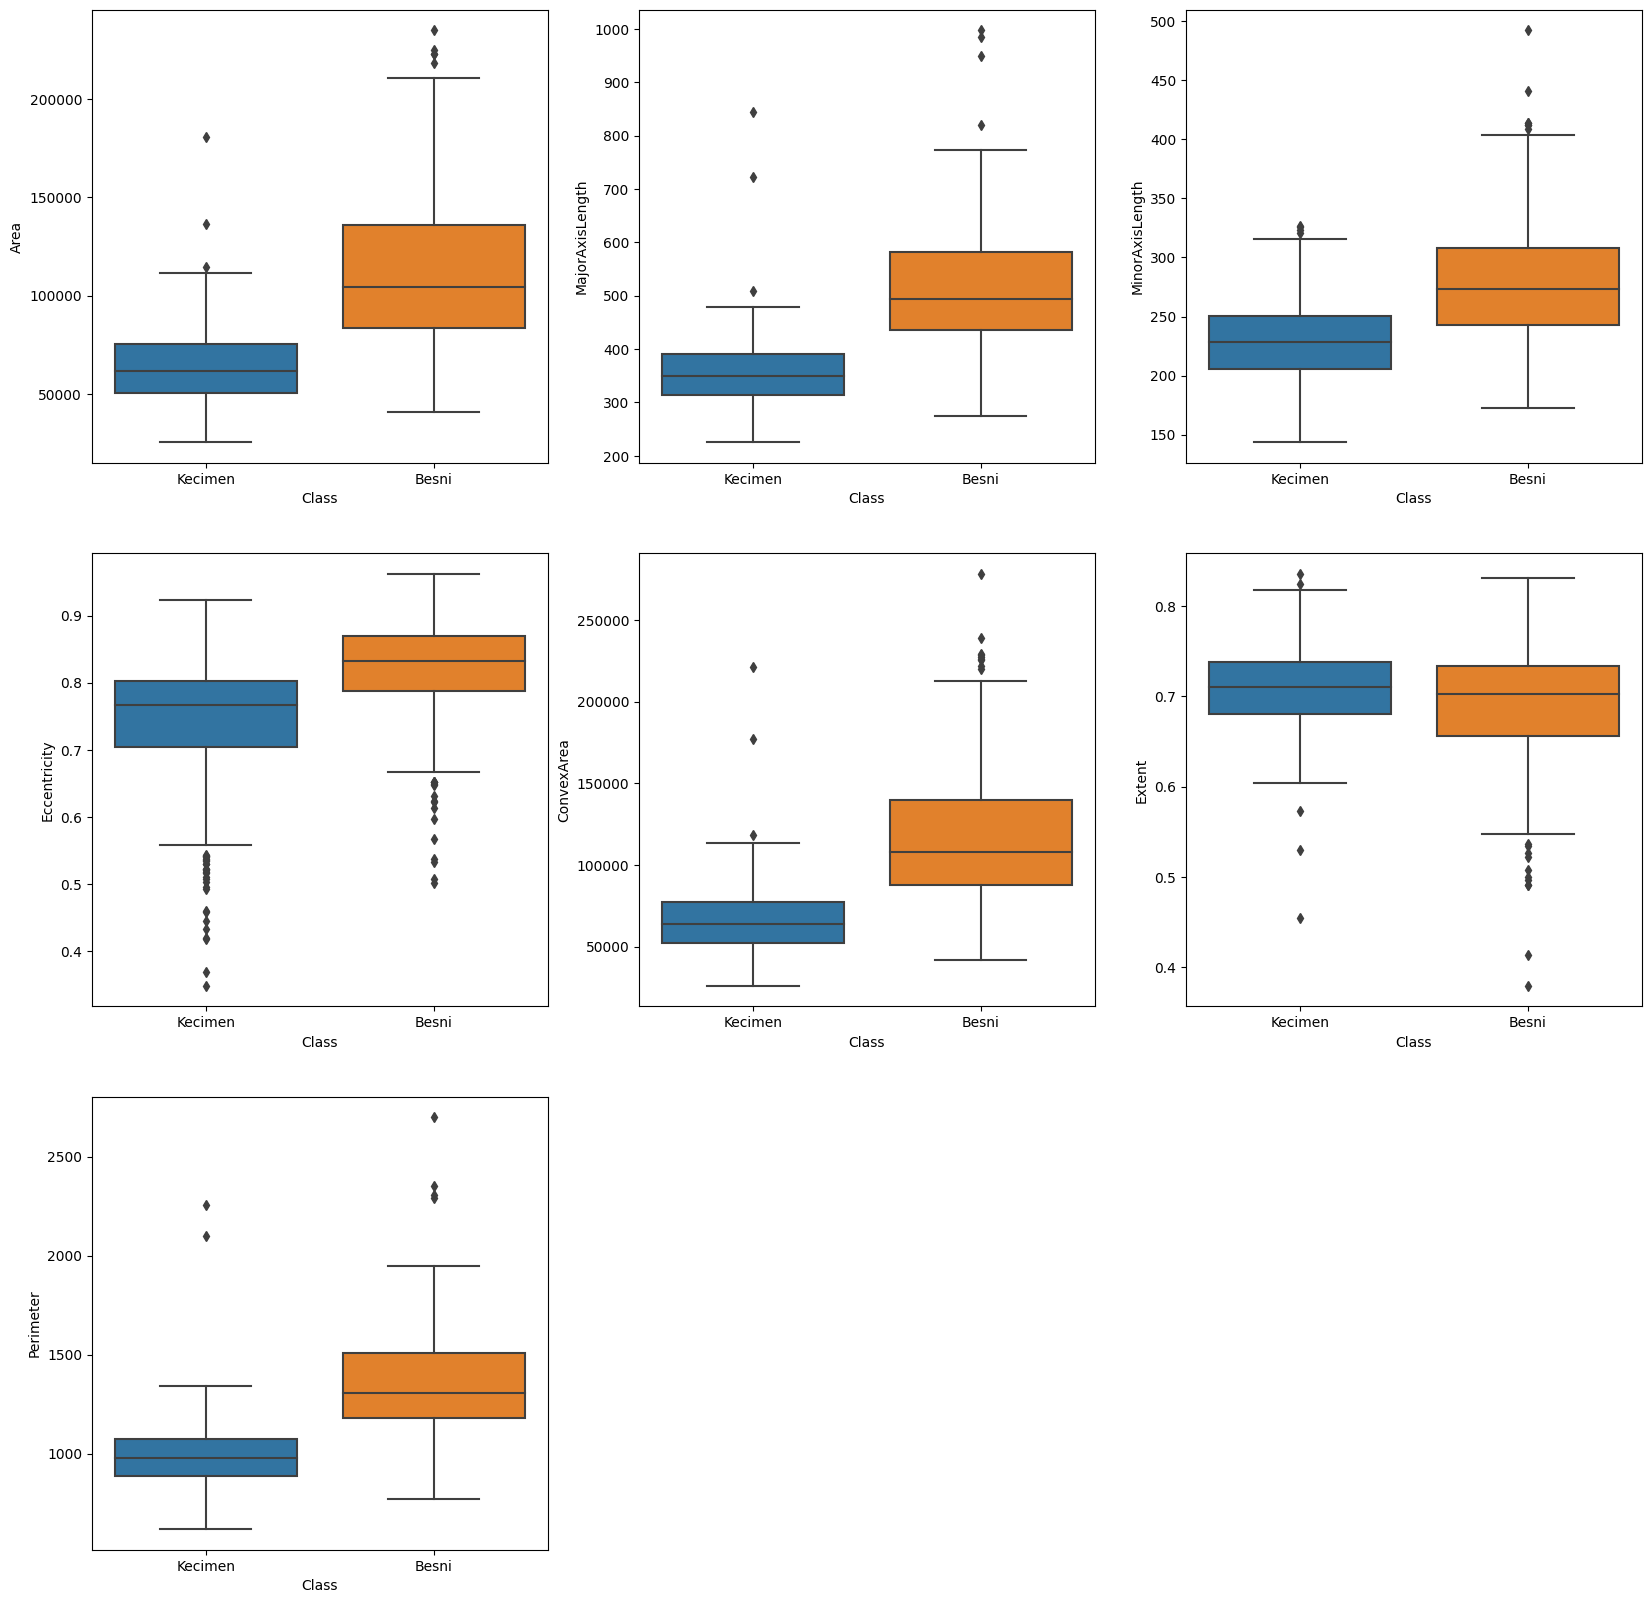

In [10]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()

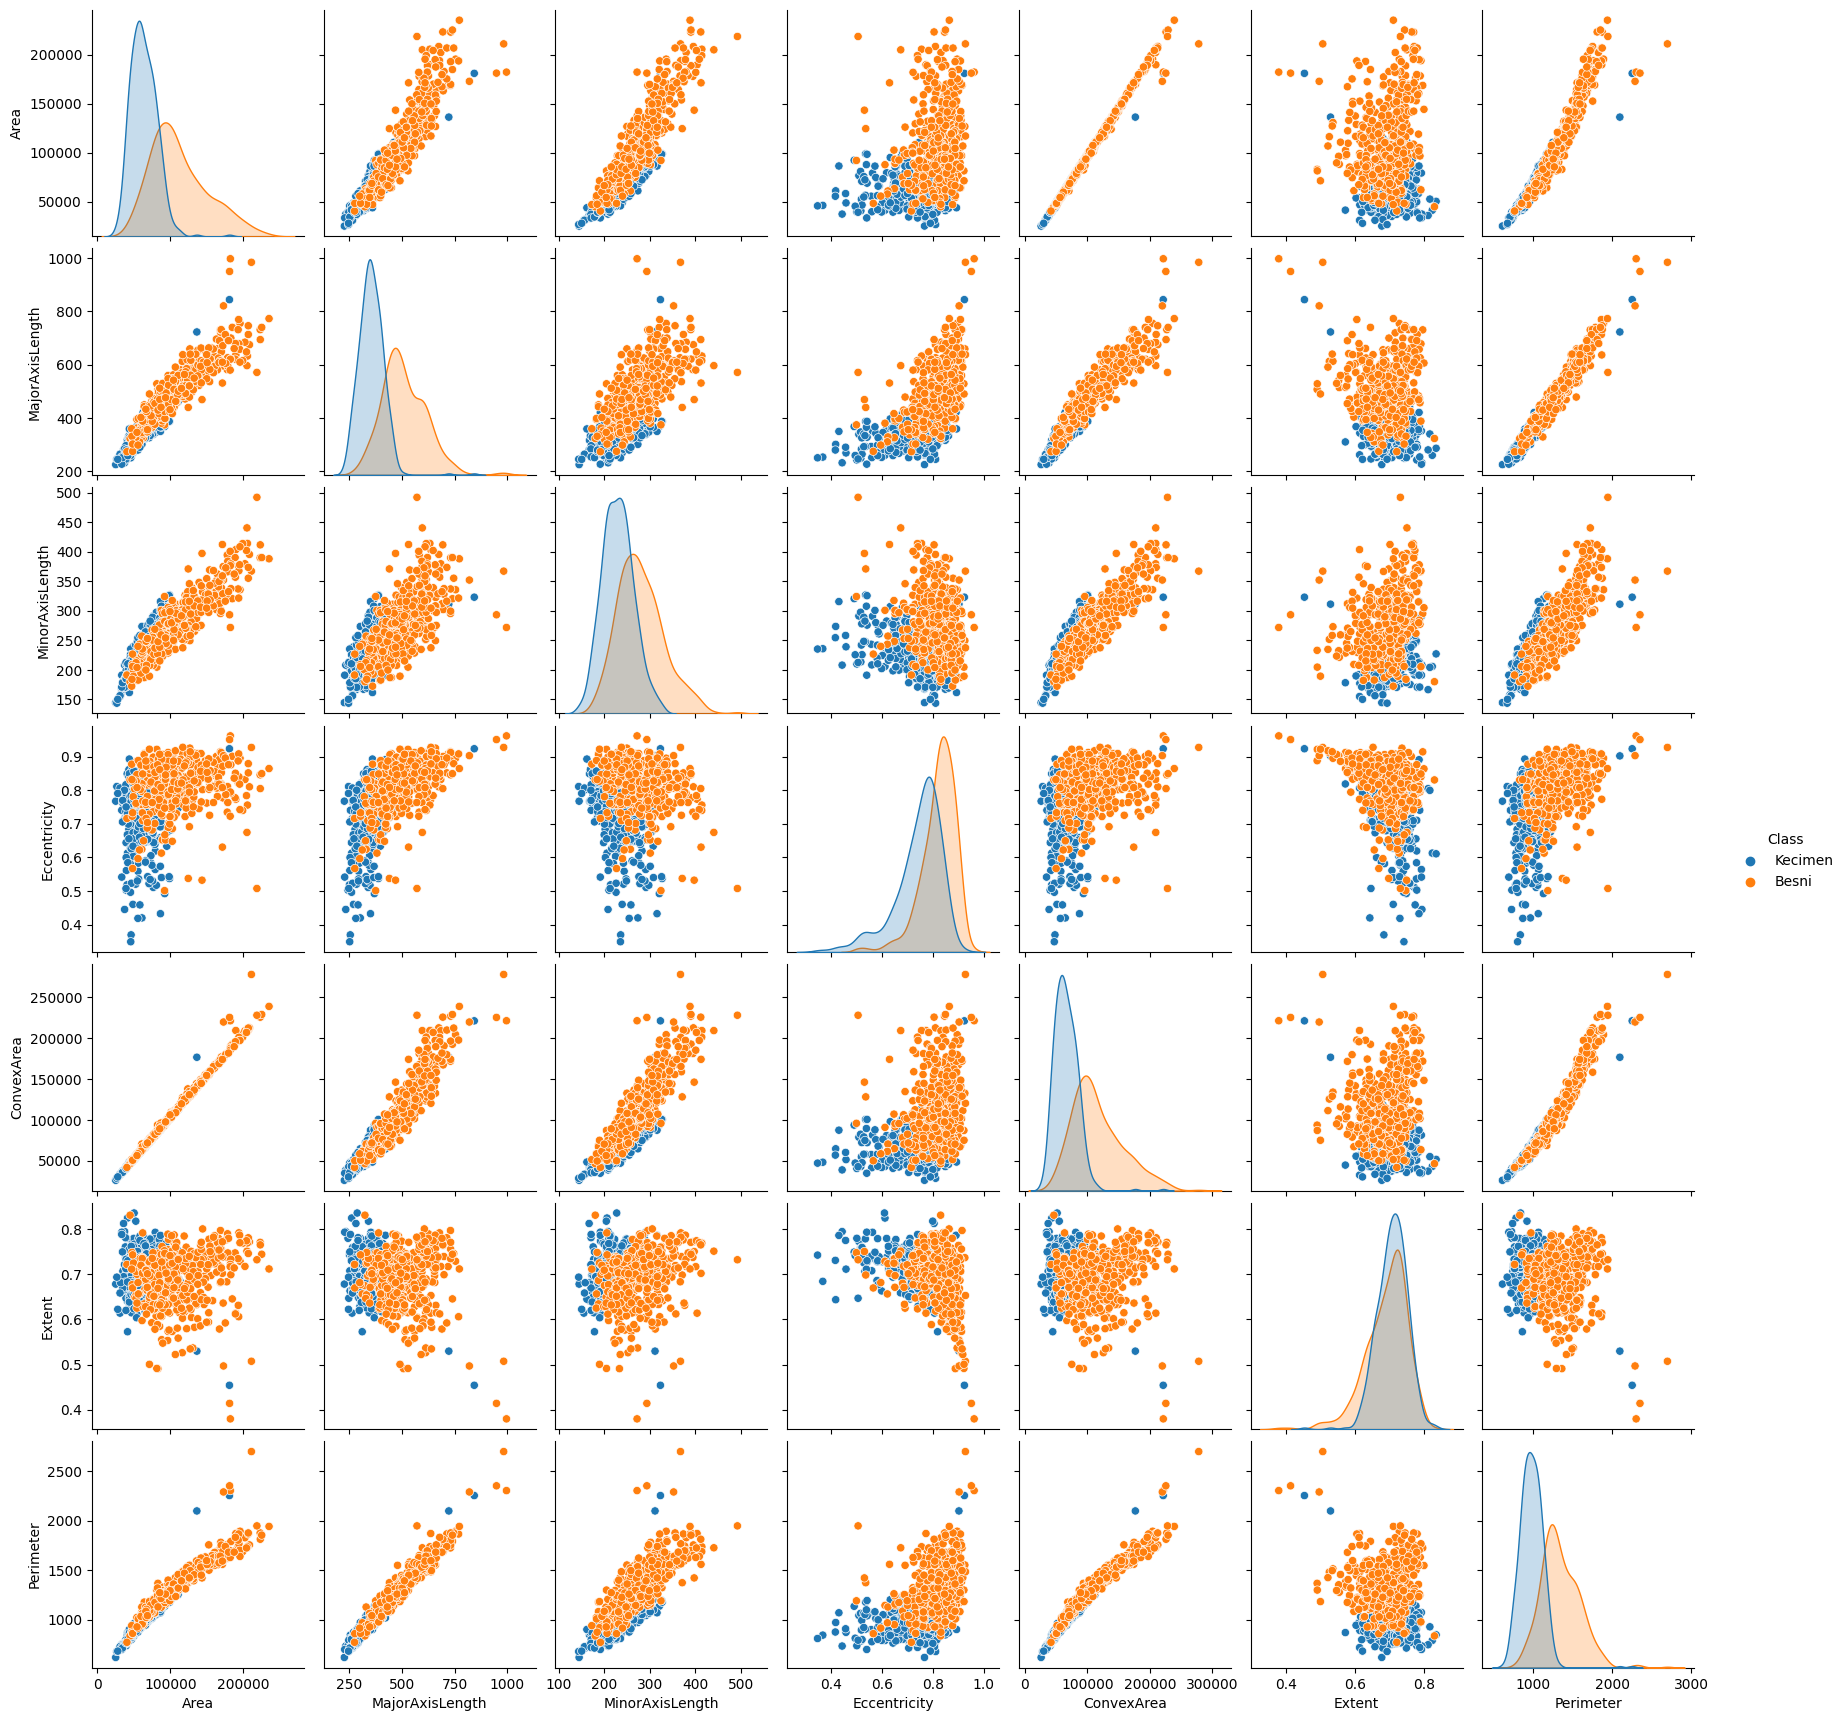

In [11]:
sns.pairplot(df, hue = "Class");

In [12]:
import plotly.express as px
colors = df["Class"].map({"Keciman":0, "Besni":1})
fig = px.scatter_3d(df, x="Area", y="Eccentricity", z="Extent", color=colors)
fig.show()

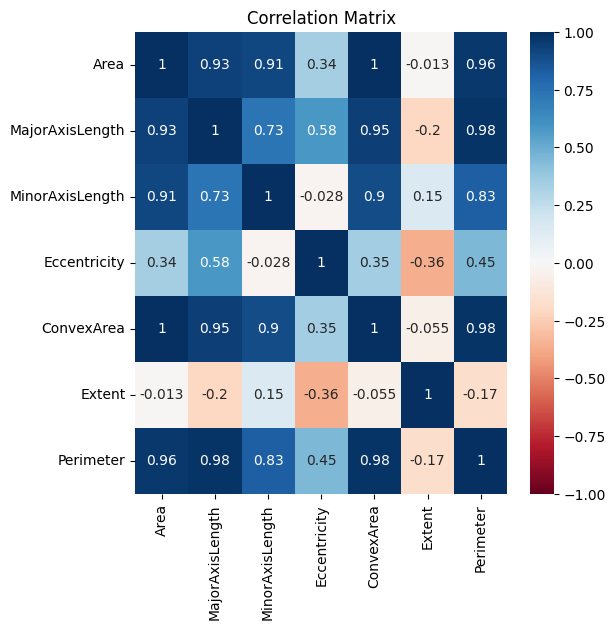

In [13]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

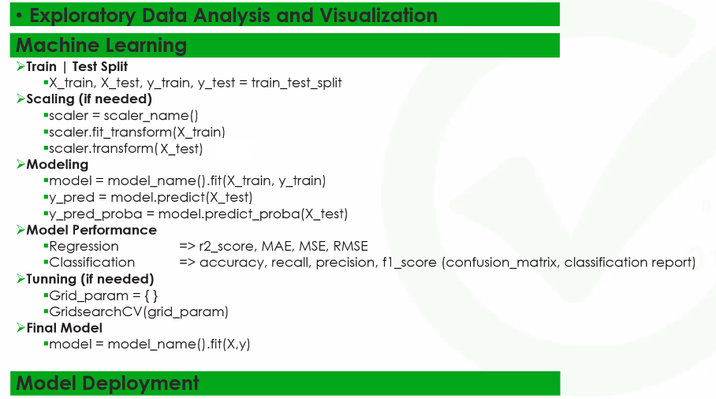

## Train | Test Split

In [14]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Scaling

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 

In [22]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.43877107e-01, 7.56122893e-01],
       [7.38204909e-01, 2.61795091e-01],
       [9.97737555e-01, 2.26244543e-03],
       [7.83402404e-01, 2.16597596e-01],
       [8.87310588e-01, 1.12689412e-01],
       [9.56089163e-02, 9.04391084e-01],
       [8.90879793e-01, 1.09120207e-01],
       [1.73898426e-01, 8.26101574e-01],
       [6.15465030e-01, 3.84534970e-01],
       [5.17792366e-01, 4.82207634e-01],
       [9.71270901e-01, 2.87290994e-02],
       [5.15493450e-01, 4.84506550e-01],
       [7.22934363e-01, 2.77065637e-01],
       [6.39585147e-01, 3.60414853e-01],
       [8.44811454e-02, 9.15518855e-01],
       [2.57092929e-01, 7.42907071e-01],
       [2.83470479e-02, 9.71652952e-01],
       [3.92874383e-02, 9.60712562e-01],
       [2.05110377e-01, 7.94889623e-01],
       [3.75449475e-01, 6.24550525e-01],
       [6.44108803e-02, 9.35589120e-01],
       [9.45542410e-01, 5.44575898e-02],
       [9.99135210e-01, 8.64789816e-04],
       [9.99999394e-01, 6.05817770e-07],
       [1.145558

## Model Performance

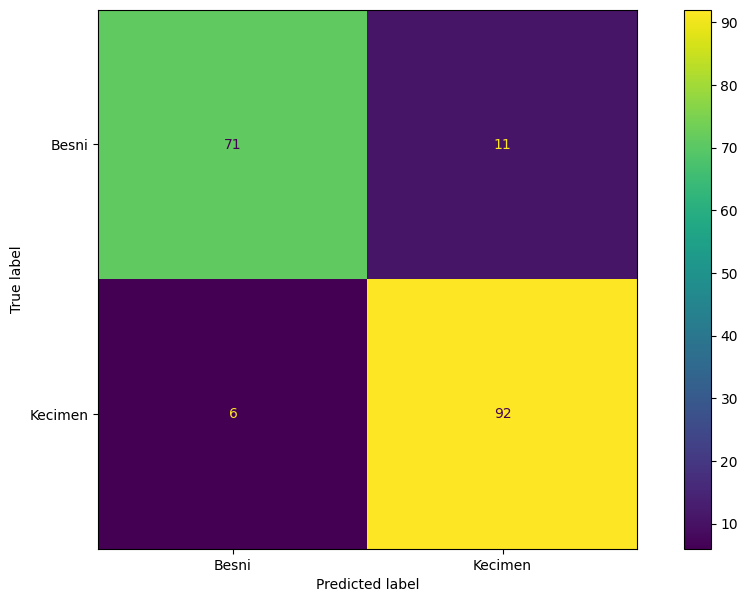

In [23]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [24]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [25]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[71 11]
 [ 6 92]]
              precision    recall  f1-score   support

       Besni       0.92      0.87      0.89        82
     Kecimen       0.89      0.94      0.92        98

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[309  59]
 [ 43 309]]
              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       368
     Kecimen       0.84      0.88      0.86       352

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



### Cross Validate

In [26]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.858
test_precision_weighted   0.861
test_recall_weighted      0.858
test_f1_weighted          0.858
dtype: float64

In [27]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_Besni"] = y_pred_proba[:,0]
test_data["pred_proba_Kecimen"] = y_pred_proba[:,1]
test_data.sample(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
241   43345          323.859          175.186         0.841       46785   
365   47602          296.493          206.225         0.718       49089   
555  121034          518.720          305.736         0.808      125665   
714   85449          471.125          238.329         0.863       89794   
231   52693          283.504          242.114         0.520       54860   
629   83059          440.560          243.637         0.833       88806   
138   53758          359.532          193.401         0.843       57197   
56    57127          311.645          238.642         0.643       59943   
334   72483          334.418          282.681         0.534       74945   
128   47478          299.819          205.296         0.729       48900   

     Extent  Perimeter    Class     pred  pred_proba_Besni  pred_proba_Kecimen  
241   0.649    877.020  Kecimen  Kecimen             0.113               0.887  
365   0.721    840.545  Kecimen  Kecimen             0.046               0.954  
555   0.707   1418.304    Besni    Besni             0.946               0.054  
714   0.585   1246.200    Besni    Besni             0.840               0.160  
231   0.738    895.745  Kecimen  Kecimen             0.035               0.965  
629   0.686   1238.163    Besni    Besni             0.755               0.245  
138   0.710    965.068  Kecimen  Kecimen             0.207               0.793  
56    0.694    952.023  Kecimen  Kecimen             0.084               0.916  
334   0.706   1052.159  Kecimen  Kecimen             0.128               0.872  
128   0.721    861.179  Kecimen  Kecimen             0.054               0.946

### GridSearchCV

In [28]:
log_model = LogisticRegression(max_iter=100000, random_state=42)

In [29]:
penalty = ["l2"]

C = np.logspace(-1, 5, 20) ## Alpha nın tersi şeklinde çalışıyor

param_grid = {"penalty" : penalty,
             "C" : C}

In [30]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=10)

In [31]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, random_state=42),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l2']})

In [32]:
grid_model.best_params_

{'C': 0.20691380811147897, 'penalty': 'l2'}

In [33]:
grid_model.best_score_

0.8597222222222222

In [34]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 

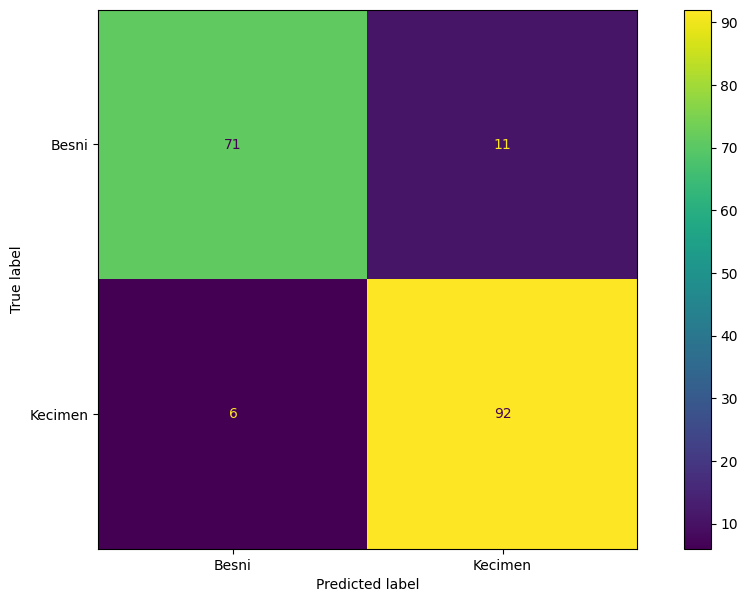

In [35]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

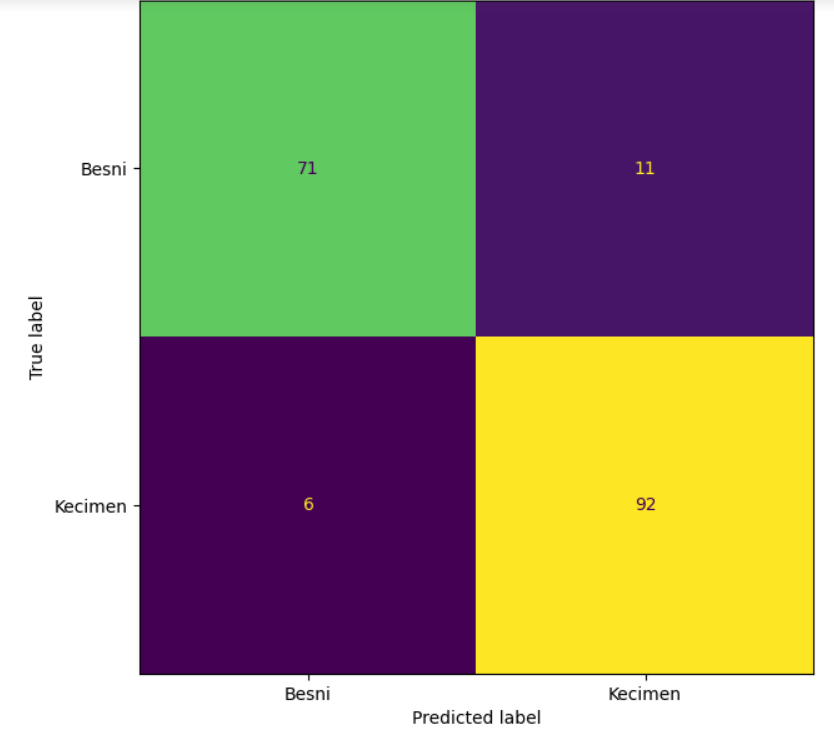

In [36]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[71 11]
 [ 6 92]]
              precision    recall  f1-score   support

       Besni       0.92      0.87      0.89        82
     Kecimen       0.89      0.94      0.92        98

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180


Train_Set
[[308  60]
 [ 45 307]]
              precision    recall  f1-score   support

       Besni       0.87      0.84      0.85       368
     Kecimen       0.84      0.87      0.85       352

    accuracy                           0.85       720
   macro avg       0.85      0.85      0.85       720
weighted avg       0.85      0.85      0.85       720



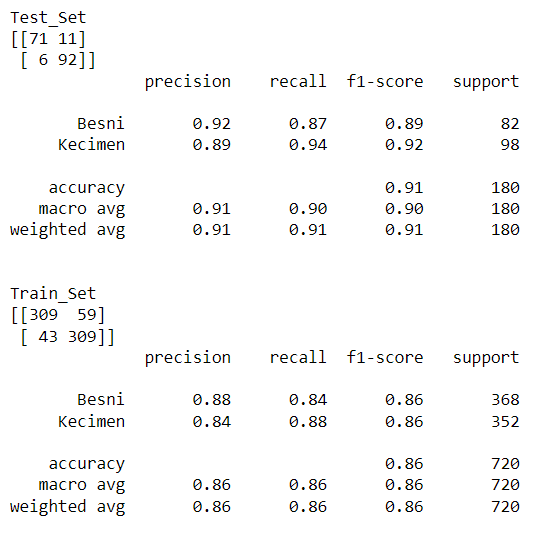

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [37]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

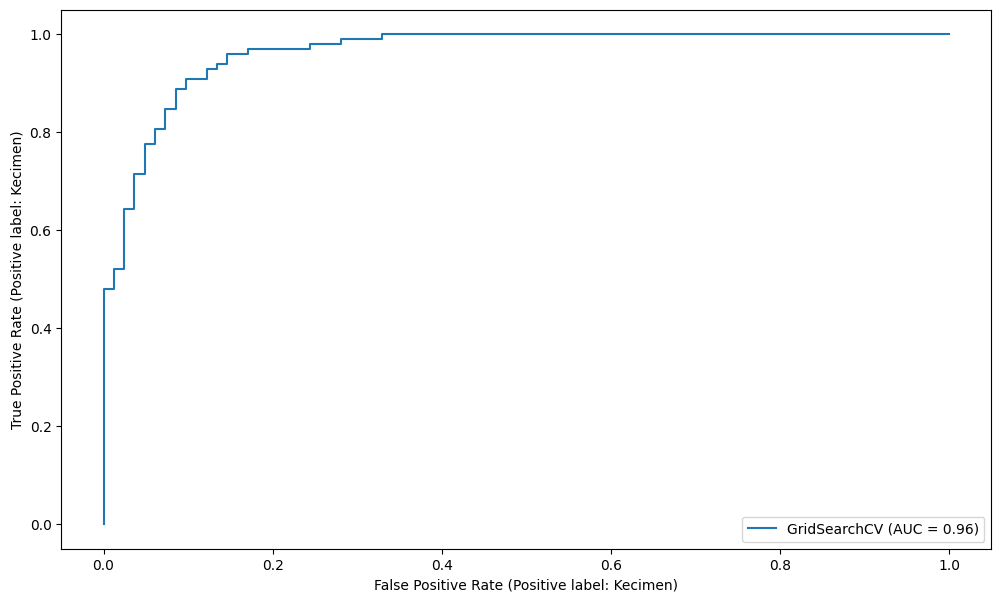

In [38]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

In [39]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9642857142857142

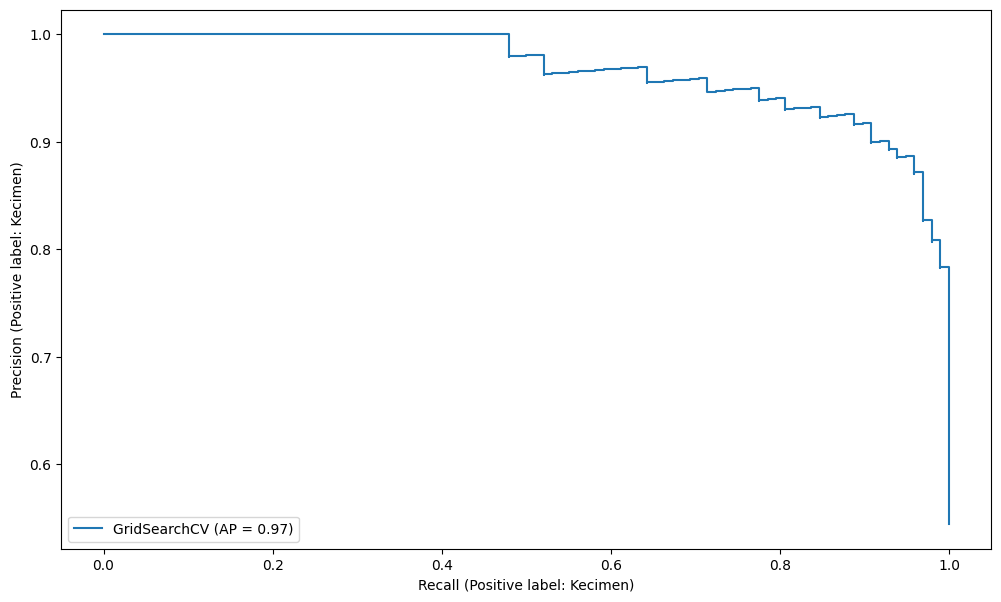

In [40]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test); 

## Final Model and Model Deployment

In [41]:
scaler = StandardScaler().fit(X) #bütün datayı scale yapıyorum

In [42]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb')) #scale modelimi kayıt ediyorum

In [43]:
X_scaled = scaler.transform(X) #sonra transform yapıyorum

In [44]:
final_model = LogisticRegression(C = 0.20691380811147897, penalty = 'l2').fit(X_scaled, y)#final modelimi oluşturuyorum

In [45]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))#onuda kayıt ediyorum

In [46]:
my_dict = {"Area": [43000, 52000, 103000],
           "MajorAxisLength": [324, 360, 470],
           "MinorAxisLength": [173, 182, 280],
           "Eccentricity": [0.846, 0.860, 0.800],
           "ConvexArea": [43500, 54000, 105000],
           "Extent": [0.7, 0.65, 0.79],
           "Perimeter": [850, 970, 1300]
           }

In [47]:
sample = pd.DataFrame(my_dict)
sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0   43000              324              173         0.846       43500   0.700   
1   52000              360              182         0.860       54000   0.650   
2  103000              470              280         0.800      105000   0.790   

   Perimeter  
0        850  
1        970  
2       1300

In [48]:
scaler_sample = pickle.load(open("scaler_raisin", "rb"))

In [49]:
sample_scaler = scaler_sample.transform(sample)

In [50]:
final_model = pickle.load(open("final_model_raisin", "rb"))

In [51]:
prediction = final_model.predict(sample_scaler)
prediction_proba = final_model.predict_proba(sample_scaler)

In [52]:
sample["pred"] = prediction
sample["pred_proba_besni"] = prediction_proba[:,0]
sample["pred_proba_kecimen"] = prediction_proba[:,1]
sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0   43000              324              173         0.846       43500   0.700   
1   52000              360              182         0.860       54000   0.650   
2  103000              470              280         0.800      105000   0.790   

   Perimeter     pred  pred_proba_besni  pred_proba_kecimen  
0        850  Kecimen             0.089               0.911  
1        970  Kecimen             0.249               0.751  
2       1300    Besni             0.791               0.209